In [13]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import os, glob
import torch

from models.main import build_network
from preprocess import get_data

In [14]:
class Args:
    model='ae'
    r='./experiments'
    lr=0.0001
    z_dim=128
    in_dim=152
    data_pth='../data'
    batch_size=128
    outlier='none'
    hierClass='Transient'
    fold=0

args = Args()
if args.outlier!='none':
    job_name = '{}_{}_{}_lr{}_ld{}_fold{}'.format(args.model, args.hierClass, args.outlier, 
                                                  args.lr, args.z_dim, args.fold)
else:
    job_name = '{}_{}_fold{}'.format(args.model, args.hierClass, args.fold)
args.directory = os.path.join(args.r, job_name)

In [ ]:
from utils.normalize import HandcraftedFeaturePreprocessor

OLS = [
'ZTF18abnoiex',
'ZTF18abdrrig',
'ZTF17aaarwdn',
'ZTF20aahnaba',
'ZTF18abinhyo',
'ZTF18adauaqh',
'ZTF18abjltdk',
'ZTF18abctkym',
'ZTF17aackvtt',
'ZTF20aarxxvk',
'ZTF18adavpai',
'ZTF19aamofar',
'ZTF19aanobfy',
'ZTF19aaerdns',
'ZTF18abajfvj',
'ZTF19actfdrw',
'ZTF18abloyuc',
'ZTF18aagtgcp',
'ZTF18achcjvn',
'ZTF18acpdqvz',
'ZTF19aaakvdx',
'ZTF19aaakxbi',
'ZTF19aamvxnr',
'ZTF18acvlbpa',
'ZTF17aaanrte',
'ZTF18abvtinx',
'ZTF20aaekjcv',
'ZTF18acwzeil',
'ZTF18acenjsn',
'ZTF18abilnwv',
'ZTF18abhcpmo',
'ZTF20abfjhhi',
'ZTF18aarwvck',
'ZTF18abluuak',
'ZTF18abbrwed',
'ZTF18abinahq',
'ZTF18abmhuhr',
'ZTF18abgwcts',
'ZTF18abiybfj',
'ZTF18acpdrwq',
'ZTF19abcbwkj',
'ZTF18abtvicr',
'ZTF17aabtabq',
'ZTF19abaeeax',
'ZTF20abjanvu',
'ZTF19aaufksu',
'ZTF18adbomgs',
'ZTF18actenly',
'ZTF19aaxooyz',
'ZTF18abvpirs',
'ZTF18abtliur',
'ZTF18acetlkq',
'ZTF18abzplow',
'ZTF18ablrnbw',
'ZTF18abtljmh',
'ZTF17aabxkmx',
'ZTF19aawqhqu',
'ZTF18acvgtqi',
'ZTF18abbxzmd',
'ZTF21aayddvb',
'ZTF21abjrtpj',
'ZTF20actnrnn',
'ZTF20abzbjtq',
'ZTF20abmecfo',
'ZTF19abfxdje',
'ZTF21aajmdui',
'ZTF19abiovhj',
'ZTF18aanbmyj',
'ZTF19aawsrra',
'ZTF21abeguum',
'ZTF20aaayuvw',
'ZTF20abqtljr',
'ZTF20abgxbvp',
'ZTF20abmddts',
'ZTF20ablecdd',
'ZTF21aanfcmk',
'ZTF19aaespnw',
'ZTF18abnbhpu',
'ZTF20abrikdq',
'ZTF19aazdrwo',
'ZTF19aazqphl',
'ZTF20acxnfno',
'ZTF20aammjgo',
'ZTF20aaznqtu',
'ZTF21aawkxya',
'ZTF20acbeokd',
'ZTF20abdnvrd',
'ZTF20aamttiw',
'ZTF19abqrhvt',
'ZTF19aaybxvq',
'ZTF20abmkrwv',
'ZTF20abcdikh',
'ZTF20abqsvbd',
'ZTF19abzzmhw',
'ZTF20abhrmri',
'ZTF21aaxtubg',
'ZTF20aavvaue',
'ZTF20aapckmf',
'ZTF21abaavtq',
'ZTF18absyyig',
'ZTF18aaxmmyt',
'ZTF18aabvtsd',
'ZTF18acguaxj',
'ZTF19aaprvxl',
'ZTF19acjmjoy',
'ZTF18aacdvmi',
'ZTF19aaapftq',
'ZTF19ackncin',
'ZTF21aallanu',
'ZTF18abmmszc',
'ZTF18aagtlpi',
'ZTF18abtxtss',
'ZTF19abgfqmj',
'ZTF18aceylea',
'ZTF18abgpdfy',
'ZTF18acmyhlp',
'ZTF18abtlfum',
'ZTF18acuyqbr',
'ZTF18abaqgmw',
'ZTF20aawkrcf',
'ZTF21aahaqaa',
'ZTF18aaixldu',
'ZTF18abivkmk',
'ZTF18aaagydv',
'ZTF20abnuzos',
'ZTF18acaxaft',
'ZTF20acxtdpa',
'ZTF18aasrvql',
'ZTF19aafffaq',
'ZTF18abxebpo',
'ZTF18acskgwu',
'ZTF19aabhyac',
'ZTF19accuwyp',
'ZTF18aawsrux',
'ZTF19aargnqs',
'ZTF19aargpov',
'ZTF18abuqcyo',
'ZTF18aayhpmp',
'ZTF18aaasvcd',
'ZTF18aajlfdq',
'ZTF18aabfhnk',
'ZTF18aceeloz',
'ZTF18abckbdn',
'ZTF18abeaytd',
'ZTF18aatbxkl',
'ZTF18abxmbfq',
'ZTF17aabzbsi',
'ZTF18abiwqcb',
]

feature_list = pd.read_pickle('../data_raw/features_RF_model.pkl')
OL = pd.read_pickle('../data/unlabeled_dataset_preds_withclass.pkl')
OL = OL[(OL.index.isin(OLS[60:100]))]
feature_preprocessor = HandcraftedFeaturePreprocessor()
features = feature_preprocessor.preprocess(OL[feature_list]).values

### Learning curves

In [ ]:
from utils.plots import plot_event

event = glob.glob(os.path.join(args.directory, 'event*'))
plot_event(args)

### Analyzing latent space.

In [5]:
# train, val, test
_, _, dataloader = get_data(args)

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


{0: 'CEP', 1: 'DSCT', 2: 'E', 3: 'LPV', 4: 'Periodic-Other', 5: 'RRL'}


In [6]:
model_pth = os.path.join(args.directory, 'trained_parameters.pth')
state_dict = torch.load(model_pth)
model = build_network(args)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [7]:
zs = []
xrec = []
xreal = []
lbls_out = []
lbls_class = []
for _, x, lbl_class, lbl_out in dataloader:
    with torch.no_grad():
        model.eval()
        x = x.float()

        z, _ = model(x)
        zs.append(z)
        #xrec.append(x_hat)
        xreal.append(x)
        lbls_out.append(lbl_out)
        lbls_class.append(lbl_class)
zs = torch.cat(zs).numpy()
#xrec = torch.cat(xrec).numpy()
xreal = torch.cat(xreal).numpy()
lbls_out = torch.cat(lbls_out).numpy()
lbls_class = torch.cat(lbls_class).numpy()

In [8]:
z_ol, _ = model(torch.FloatTensor(features))
z_t = np.concatenate([zs,z_ol.detach().numpy()])

In [9]:
from sklearn.manifold import TSNE
import numpy as np 

x_embedded = TSNE(n_components=2).fit_transform(z_t)

In [10]:
x_ol = x_embedded[-len(z_ol):]
x_embedded = x_embedded[:len(zs)]

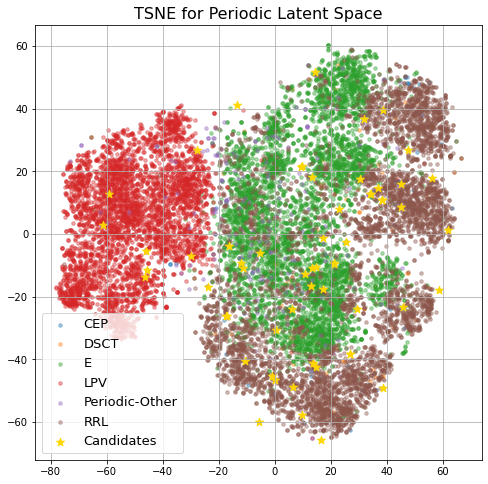

In [12]:
dict_classes = {0: 'CEP', 1: 'DSCT', 2: 'E', 3: 'LPV', 4: 'Periodic-Other', 5: 'RRL'}


plt.figure(figsize=(8,8))
plt.title('TSNE for {} Latent Space'.format(args.hierClass), fontsize=16)
for key in range(len(np.unique(lbls_class))):
    plt.scatter(x_embedded[:, 0][lbls_class==key], x_embedded[:, 1][lbls_class==key], 
                s=50, alpha=0.4, marker='.', label=dict_classes[key])
plt.scatter(x_ol[:, 0], x_ol[:, 1], c='gold',
            s=70, alpha=1, marker='*', label='Candidates')
plt.legend(fontsize=13)
plt.grid(True)

## Analyzing reconstructions.

In [ ]:
feature_list_pth='../data_raw/features_RF_model.pkl'
feature_list = pd.read_pickle(feature_list_pth)
feature_list

# Some important features
important_features = [
'W1-W2',
'sgscore1',
'positive_fraction_2',
'positive_fraction_1',
'SPM_tau_rise_1',
'LinearTrend_2', 
'SPM_chi_1', 
'g-W2', 
'g-W3', 
'n_non_det_after_fid_2',
'W2-W3',
'SPM_beta_1',
'SPM_tau_rise_2',
'SPM_A_2',
'IAR_phi_1',
'IAR_phi_2',
]

In [ ]:
def update(handle, orig):
    handle.update_from(orig)
    handle.set_alpha(1)

from matplotlib.collections import PathCollection
from matplotlib.legend_handler import HandlerPathCollection, HandlerLine2D

f, ax = plt.subplots(nrows=4, ncols=4, figsize=(16,16), sharey=True, sharex=True)

colors = {0: ('b', 'o'), #inlier
          1: ('g', 'X'), #misspred
          2: ('red', '*'), #outlier
}

ident = [-1.0, 1.0]
for i, feature in enumerate(important_features):
    ix = important_features.index(feature)
    ax[i//4, i%4].set_title(feature)
    for key in range(len(np.unique(lbls_out))):
        ax[i//4, i%4].scatter(xreal[:,ix][lbls_out==key], xrec[:,ix][lbls_out==key], 
                              label=dict_classes[key], s=20, alpha=0.25, c=colors[key][0],
                              marker=colors[key][1])
    ax[i//4, i%4].plot(ident, ident, c='r')
    ax[i//4, i%4].set_ylim(np.min(xreal[:,ix]), np.max(xreal[:,ix]))
    ax[i//4, i%4].set_xlim(np.min(xreal[:,ix]), np.max(xreal[:,ix]))
    ax[i//4, i%4].set_xlabel('real')
    ax[i//4, i%4].set_ylabel('pred')
    ax[i//4, i%4].grid()
    ax[i//4, i%4].legend(loc='best', handler_map={PathCollection : HandlerPathCollection(update_func= update),
                         plt.Line2D : HandlerLine2D(update_func = update)})
plt.show()

### Analizing scores

In [ ]:
scores = np.sum((xrec - xreal)**2, axis=1)

plt.figure(figsize=(8,4))
plt.title('Histogram')
for key in range(len(np.unique(lbls_out))):
    plt.hist(scores[lbls_out==key], label=dict_classes[key], bins=25, 
             density=True, histtype='step', color=colors[key][0])
plt.legend(fontsize=15)

### Report metrics

In [ ]:
from sklearn.metrics import auc

def auroc(in_scores, out_scores):
    scores = np.concatenate((in_scores, out_scores), axis=0)
    start = np.min(scores)
    end = np.max(scores)   
    gap = (end - start)/100000

    aurocBase = 0.0
    fprTemp = 1.0
    tprs = []
    fprs = []

    for delta in np.arange(start, end, gap):
        tpr = np.sum(np.sum(out_scores > delta)) / len(scores)
        fpr = np.sum(np.sum(in_scores > delta)) / len(in_scores)
        tprs.append(tpr)
        fprs.append(fpr)
    return auc(fprs, tprs), fprs, tprs

def aupr(in_scores, out_scores):
    scores = np.concatenate((in_scores, out_scores), axis=0)
    start = np.min(scores)
    end = np.max(scores)   
    gap = (end - start)/100000

    precisions = []
    recalls = []
    for delta in np.arange(start, end, gap):
        tp = np.sum(np.sum(out_scores > delta))
        fp = np.sum(np.sum(in_scores > delta))
        if tp + fp == 0: continue
        precision = tp / (tp + fp)
        recall = tp / np.float(len(out_scores))
        precisions.append(precision)
        recalls.append(recall)
    auc(recalls, precisions)
    return auc(recalls, precisions), recalls, precisions

In [ ]:
in_scores = scores[lbls_out==0]
out_scores = scores[(lbls_out==1) | (lbls_out==2)]
auroc_score, fprs, tprs = auroc(in_scores, out_scores)
aupr_score, recalls, precisions = aupr(in_scores, out_scores)
'AUROC {} AUPR {}'.format(auroc_score, aupr_score)

In [ ]:
ident=[0.0, 1.0]
plt.title('AUROC curve. Score: {:.2f}'.format(auroc_score), fontsize=20)
plt.plot(fprs, tprs)
plt.plot(ident, ident, c='r')
plt.xlabel('FPR', fontsize=18)
plt.ylabel('TPR', fontsize=18)
plt.grid()

In [ ]:
ident=[[0, 1], [1, 0]]
plt.title('AUPR curve. Score: {:.2f}'.format(aupr_score), fontsize=20)
plt.plot(recalls, precisions)
plt.plot(ident[0], ident[1], c='r')
plt.xlabel('recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.grid()